# Extraction de features d'images
On va ici chercher à extraire des features à partir des images des produits
## Sommaire :
- [A - Prétraitement des images](#A)
- [B - Extraction de features des images](#B)
    - [B.1 - Features avec ORB](#B.1)
    - [B.2 - Features avec SIFT](#B.2)
- [C - Création du Bag of Visual Words](#C)
    - [C.1 - ORB](#C.1)
    - [C.2 - SIFT](#C.2)
    - [C.3 - Création du Bag Of Visual Words & Histogramme des images](#C.3)
- [D - Enregistrement des Bag of Visual Words](#D)

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## A - Prétraitement des images <a name=A ></a>
On va créer une fonction de preprocessing qui va appliquer à une image chargée, un débruitage avec un flou Gaussien et égaliser l'exposition avec l'égalisateur CLAHE :
- Débruiter : Flou Gaussien ([Source](https://docs.opencv.org/4.5.1/d4/d13/tutorial_py_filtering.html))
- Egalisation des histogrammes (exposition) : CLAHE ([Source](https://docs.opencv.org/4.5.1/d5/daf/tutorial_py_histogram_equalization.html))

In [2]:
#fonction de preprocessing
def preprocess(image):
    #débruiter les images
    blur = cv2.GaussianBlur(image,(5,5),0)
    #égalisation des histogrammes
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    eg = clahe.apply(blur)
    return eg

In [3]:
#chargement de la liste des images
data = pd.read_csv("Data/desc.csv")
data=data[['uniq_id','image']]
data

,uniq_id,image
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


## B - Extraction de features des images <a name=B ></a>
On va utiliser 2 algorithmes pour extraire des features des images :
- Avec ORB
- Avec SIFT
[Source](https://www.kaggle.com/pierre54/bag-of-words-model-with-sift-descriptors) <br>

On va maintenant extraire les features pour toutes les images.

In [4]:
data_orb = data[['uniq_id','image']]
data_sift = data[['uniq_id','image']]

### B.1 Features avec ORB <a name=B.1 ></a>

In [5]:
#extraction des features pour chaques images
col = []

for pict in data['image']:
    path = 'Data/Images/'+pict
    #chargement image en niveau de gris
    img = cv2.imread(path,0)
    #preprocessing
    img_prep = preprocess(img)
    #extraction features
    orb = cv2.ORB_create(nfeatures=10000,fastThreshold=10) #Threshold à 10 (défaut à 20) car une image n'a pas de descripteur sinon
    kp, des = orb.detectAndCompute(img_prep,None) #recherche key_points & descripteurs
    col.append(des)

In [6]:
data_orb.insert(len(data_orb.columns),'features_orb',col)
data_orb

,uniq_id,image,features_orb
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[24, 61, 95, 253, 194, 227, 173, 95, 180, 131..."
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[[150, 173, 83, 178, 211, 196, 110, 225, 49, 4..."
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[[74, 171, 246, 60, 121, 207, 121, 248, 255, 2..."
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,"[[191, 251, 67, 71, 19, 155, 70, 176, 101, 164..."
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[[219, 151, 19, 92, 131, 116, 180, 227, 236, 3..."
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[[60, 113, 198, 183, 203, 88, 254, 217, 171, 2..."
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,"[[156, 48, 248, 251, 44, 101, 219, 216, 26, 91..."
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,"[[130, 183, 248, 93, 242, 26, 188, 255, 58, 55..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[[164, 81, 193, 187, 194, 105, 5, 152, 20, 82,..."


In [7]:
#création d'une liste contenant toutes les features, descripteurs, de toutes les images
dico_orb = []
for img in range(len(data_orb)):
    for des in data_orb['features_orb'][img]:
        dico_orb.append(des)

dico_orb

[array([ 24,  61,  95, 253, 194, 227, 173,  95, 180, 131, 254,  66, 213,
        211,  32, 109, 122, 255, 106, 136,  81, 219, 183, 108, 117, 163,
        251,   0,  41,  80, 161, 168], dtype=uint8),
 array([ 92, 127, 251, 116, 242, 218,  55,  87, 161, 172, 190, 168,  47,
        167, 193,  18,  38, 254, 197,  80,  64, 251, 160, 106, 123, 197,
         37, 169, 227, 240,  39, 235], dtype=uint8),
 array([214, 127,  30, 174,  59, 195,  22, 232, 191, 172, 187, 239, 236,
        250,  39,  80, 254, 245, 238, 227, 100,   3, 138, 255, 176, 182,
         15, 191,  16, 115,  45,   7], dtype=uint8),
 array([ 20,  70, 139, 175, 146, 166,  46, 252,  54,   3, 219, 247, 213,
        231, 184,  64, 125, 254,  47, 175,  57, 148,  13,  14, 244, 166,
        171, 196, 189, 243, 177, 176], dtype=uint8),
 array([254, 239,  51, 204,  61,  95, 214, 232,  95, 172, 252,  11, 106,
        204,  63, 180, 248, 253, 207,  99, 236,  35, 233, 255, 187,  93,
          5,  63,  87,  62,  94, 198], dtype=uint8),
 arra

### B.2 - Features avec SIFT <a name=B.2 ></a>

In [8]:
#extraction des features pour chaques images
col = []

for pict in data['image']:
    path = 'Data/Images/'+pict
    #chargement images en niveau de gris
    img = cv2.imread(path,0)
    #preprocessing
    img_prep = preprocess(img)
    #extraction features
    sift = cv2.SIFT_create(contrastThreshold=0.03) 
    kp, des = sift.detectAndCompute(img_prep,None) #recherche key_points & descripteurs
    col.append(des)

In [9]:
data_sift.insert(len(data_sift.columns),'features_sift',col)
data_sift

,uniq_id,image,features_sift
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[4.0, 2.0, 0.0, 0.0, 12.0, 7.0, 3.0, 7.0, 116..."
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[[24.0, 54.0, 35.0, 11.0, 1.0, 1.0, 1.0, 5.0, ..."
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[[45.0, 3.0, 0.0, 0.0, 0.0, 56.0, 156.0, 80.0,..."
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,"[[6.0, 32.0, 27.0, 69.0, 67.0, 0.0, 0.0, 3.0, ..."
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[[2.0, 46.0, 50.0, 1.0, 4.0, 128.0, 81.0, 2.0,..."
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[[26.0, 12.0, 0.0, 2.0, 15.0, 33.0, 40.0, 8.0,..."
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,"[[25.0, 1.0, 0.0, 0.0, 168.0, 113.0, 0.0, 2.0,..."
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,"[[149.0, 45.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[[86.0, 22.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16..."


In [10]:
#création d'une liste contenant toutes les features, descripteurs, de toutes les images
dico_sift = []
for img in range(len(data_sift)):
    for des in data_sift['features_sift'][img]:
        dico_sift.append(des)

dico_sift

[array([  4.,   2.,   0.,   0.,  12.,   7.,   3.,   7., 116.,   0.,   0.,
          0.,  69.,  37.,   1.,  17., 237.,   0.,   0.,   0.,   2.,   3.,
          0.,  38., 100.,   0.,   0.,   0.,   1.,   1.,   0.,   7.,   9.,
          2.,   1.,   3.,  12.,   8.,   9.,   9., 149.,   5.,   1.,  17.,
         71.,  19.,   1.,  13., 237.,   8.,   0.,   1.,   2.,   2.,   0.,
         29., 124.,   0.,   0.,   0.,   1.,   3.,   1.,   5.,   0.,   0.,
          0.,   0.,  11.,  14.,  17.,   7.,  91.,   1.,   0.,   3.,  47.,
         20.,   3.,  12., 237.,   2.,   0.,   0.,   1.,   1.,   1.,  25.,
         73.,   0.,   0.,   0.,   1.,   1.,   0.,   4.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32),
 array([ 96.,   3.,   0.,   0.,  21.,  23.,   3.,  13., 200.,  10.,   0.,
          0.,   0.,   0.,   0.,  15., 200.,  

## C - Création du Bag of Visual Words <a name=C ></a>
Maintenant que l'on a extrait nos features on va créer un "Bag of Visual Words". C'est à dire que l'on va créer un catalogue de "mots visuels" qui décrivent les images en réalisant un clustering sur les features que l'on viens d'extraire. Comme il y a beaucoup de features extraites, cela va nous permettre de les classifier pour réduire le nombre de dimension. Ensuite on va compter le nombre d'occurence de chaques classes, c'est ce qui va constituer le Bag of Visual Words, "l'empreinte digitale" de chaques images.
### C.1 - ORB <a name=C.1 ></a>

In [11]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

start_fit: 70
end_fit 70
start_fit: 140
end_fit 140
start_fit: 210
end_fit 210
start_fit: 350
end_fit 350
start_fit: 490
end_fit 490
start_fit: 700
end_fit 700


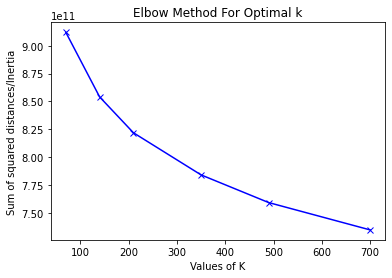

In [30]:
Sum_of_squared_distances = []
#on fixe la plage de valeur que peut prendre k, le nombre de clusters
K = [70,140,210,350,490,700]  #range(1,10) 

#on effectue la kmeans pour chaque valeurs de k, en prennant soin de fixer un random_state
for num_clusters in K : 
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=5)
    print('start_fit:',num_clusters)
    kmeans.fit(dico_orb)
    print('end_fit',num_clusters)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
#kmeans sur l'ensemble des descripteurs 
kmeans_orb = MiniBatchKMeans(n_clusters=210, random_state=5)
kmeans_orb.fit(dico_orb)

MiniBatchKMeans(n_clusters=210, random_state=5)

In [33]:
#kmean.predict sur les descripteurs de chaques images
data_orb['predBoW'] = data_orb['features_orb'].apply(lambda x: kmeans_orb.predict(x))
data_orb

,uniq_id,image,features_orb,predBoW
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[24, 61, 95, 253, 194, 227, 173, 95, 180, 131...","[127, 75, 49, 89, 70, 74, 182, 6, 127, 4, 89, ..."
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[[150, 173, 83, 178, 211, 196, 110, 225, 49, 4...","[176, 107, 208, 179, 93, 122, 20, 201, 157, 2,..."
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[[74, 171, 246, 60, 121, 207, 121, 248, 255, 2...","[172, 10, 110, 94, 16, 185, 6, 10, 19, 139, 15..."
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,"[[191, 251, 67, 71, 19, 155, 70, 176, 101, 164...","[114, 187, 79, 108, 126, 22, 46, 82, 73, 136, ..."
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[[219, 151, 19, 92, 131, 116, 180, 227, 236, 3...","[3, 140, 208, 183, 79, 199, 140, 181, 188, 11,..."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[[60, 113, 198, 183, 203, 88, 254, 217, 171, 2...","[178, 173, 93, 125, 146, 20, 120, 137, 71, 126..."
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,"[[156, 48, 248, 251, 44, 101, 219, 216, 26, 91...","[58, 177, 185, 7, 177, 81, 72, 155, 108, 172, ..."
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,"[[130, 183, 248, 93, 242, 26, 188, 255, 58, 55...","[65, 154, 161, 20, 156, 40, 33, 33, 61, 102, 9..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[[164, 81, 193, 187, 194, 105, 5, 152, 20, 82,...","[42, 55, 187, 46, 27, 52, 200, 8, 115, 136, 13..."


### C.2 - SIFT <a name=C.2 ></a>

start_fit: 70
end_fit 70
start_fit: 140
end_fit 140
start_fit: 210
end_fit 210
start_fit: 350
end_fit 350
start_fit: 450
end_fit 450
start_fit: 550
end_fit 550
start_fit: 700
end_fit 700


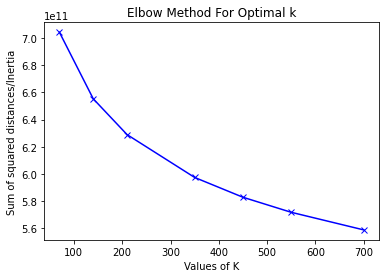

In [34]:
Sum_of_squared_distances = []
#on fixe la plage de valeur que peut prendre k, le nombre de clusters
K = [70,140,210,350,450,550,700] #range(1,10) 

#on effectue la kmeans pour chaque valeurs de k, en prennant soin de fixer un random_state
for num_clusters in K : 
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=5)
    print('start_fit:',num_clusters)
    kmeans.fit(dico_sift)
    print('end_fit',num_clusters)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
#kmeans sur l'ensemble des descripteurs 
kmeans_sift = MiniBatchKMeans(n_clusters=210, random_state=5)
kmeans_sift.fit(dico_sift)

MiniBatchKMeans(n_clusters=210, random_state=5)

In [37]:
#kmean.predict sur les descripteurs de chaques images
data_sift['predBoW'] = data_sift['features_sift'].apply(lambda x: kmeans_sift.predict(x))
data_sift

,uniq_id,image,features_sift,predBoW
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[4, 2, 0, 0, 12, 7, 3, 7, 116, 0, 0, 0, 69, 3...","[152, 126, 129, 78, 200, 99, 4, 160, 167, 147,..."
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[[24, 54, 35, 11, 1, 1, 1, 5, 100, 122, 3, 0, ...","[110, 75, 55, 75, 143, 122, 68, 122, 24, 162, ..."
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[[45, 3, 0, 0, 0, 56, 156, 80, 159, 25, 0, 0, ...","[16, 110, 126, 14, 152, 14, 119, 165, 165, 43,..."
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,"[[6, 32, 27, 69, 67, 0, 0, 3, 18, 7, 16, 19, 1...","[11, 116, 154, 2, 10, 106, 183, 163, 183, 101,..."
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[[2, 46, 50, 1, 4, 128, 81, 2, 86, 128, 54, 0,...","[199, 115, 134, 132, 77, 22, 136, 108, 21, 5, ..."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[[26, 12, 0, 2, 15, 33, 40, 8, 63, 1, 0, 1, 4,...","[165, 160, 14, 14, 8, 14, 14, 14, 14, 126, 14,..."
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,"[[25, 1, 0, 0, 168, 113, 0, 2, 168, 13, 0, 0, ...","[95, 200, 200, 14, 43, 51, 51, 52, 94, 161, 16..."
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,"[[149, 45, 0, 0, 0, 0, 0, 0, 149, 22, 0, 0, 1,...","[50, 60, 65, 50, 36, 35, 185, 25, 83, 99, 149,..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[[86, 22, 0, 0, 0, 0, 0, 0, 165, 16, 0, 0, 0, ...","[138, 138, 182, 91, 27, 91, 94, 50, 36, 30, 20..."


### C.3 - Création du Bag Of Visual Words & Histogramme des images <a name=C.3 ></a>

In [38]:
import collections

In [39]:
#fonction qui renvoie le Bag of Images pour une image
def imBow(dicoDes):
    dct={}
    colec = collections.Counter(dicoDes)
    for i in range(len(colec)):
        dct[i]=colec[i]
    return dct

In [40]:
data_orb['countBoW'] = data_orb['predBoW'].apply(lambda x: imBow(x))
data_orb

,uniq_id,image,features_orb,predBoW,countBoW
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[24, 61, 95, 253, 194, 227, 173, 95, 180, 131...","[127, 75, 49, 89, 70, 74, 182, 6, 127, 4, 89, ...","{0: 69, 1: 44, 2: 44, 3: 59, 4: 28, 5: 62, 6: ..."
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[[150, 173, 83, 178, 211, 196, 110, 225, 49, 4...","[176, 107, 208, 179, 93, 122, 20, 201, 157, 2,...","{0: 45, 1: 41, 2: 24, 3: 59, 4: 42, 5: 51, 6: ..."
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[[74, 171, 246, 60, 121, 207, 121, 248, 255, 2...","[172, 10, 110, 94, 16, 185, 6, 10, 19, 139, 15...","{0: 40, 1: 38, 2: 27, 3: 26, 4: 53, 5: 36, 6: ..."
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,"[[191, 251, 67, 71, 19, 155, 70, 176, 101, 164...","[114, 187, 79, 108, 126, 22, 46, 82, 73, 136, ...","{0: 81, 1: 20, 2: 42, 3: 93, 4: 12, 5: 41, 6: ..."
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[[219, 151, 19, 92, 131, 116, 180, 227, 236, 3...","[3, 140, 208, 183, 79, 199, 140, 181, 188, 11,...","{0: 38, 1: 121, 2: 69, 3: 45, 4: 83, 5: 42, 6:..."
...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[[60, 113, 198, 183, 203, 88, 254, 217, 171, 2...","[178, 173, 93, 125, 146, 20, 120, 137, 71, 126...","{0: 36, 1: 110, 2: 57, 3: 20, 4: 189, 5: 57, 6..."
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,"[[156, 48, 248, 251, 44, 101, 219, 216, 26, 91...","[58, 177, 185, 7, 177, 81, 72, 155, 108, 172, ...","{0: 30, 1: 69, 2: 11, 3: 11, 4: 106, 5: 13, 6:..."
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,"[[130, 183, 248, 93, 242, 26, 188, 255, 58, 55...","[65, 154, 161, 20, 156, 40, 33, 33, 61, 102, 9...","{0: 41, 1: 62, 2: 101, 3: 31, 4: 108, 5: 52, 6..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[[164, 81, 193, 187, 194, 105, 5, 152, 20, 82,...","[42, 55, 187, 46, 27, 52, 200, 8, 115, 136, 13...","{0: 23, 1: 25, 2: 19, 3: 8, 4: 129, 5: 15, 6: ..."


In [41]:
data_sift['countBoW'] = data_sift['predBoW'].apply(lambda x: imBow(x))
data_sift

,uniq_id,image,features_sift,predBoW,countBoW
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[4, 2, 0, 0, 12, 7, 3, 7, 116, 0, 0, 0, 69, 3...","[152, 126, 129, 78, 200, 99, 4, 160, 167, 147,...","{0: 221, 1: 213, 2: 121, 3: 110, 4: 449, 5: 15..."
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[[24, 54, 35, 11, 1, 1, 1, 5, 100, 122, 3, 0, ...","[110, 75, 55, 75, 143, 122, 68, 122, 24, 162, ...","{0: 195, 1: 149, 2: 173, 3: 126, 4: 189, 5: 16..."
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[[45, 3, 0, 0, 0, 56, 156, 80, 159, 25, 0, 0, ...","[16, 110, 126, 14, 152, 14, 119, 165, 165, 43,...","{0: 141, 1: 149, 2: 178, 3: 14, 4: 50, 5: 110,..."
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,"[[6, 32, 27, 69, 67, 0, 0, 3, 18, 7, 16, 19, 1...","[11, 116, 154, 2, 10, 106, 183, 163, 183, 101,...","{0: 144, 1: 47, 2: 80, 3: 83, 4: 26, 5: 98, 6:..."
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[[2, 46, 50, 1, 4, 128, 81, 2, 86, 128, 54, 0,...","[199, 115, 134, 132, 77, 22, 136, 108, 21, 5, ...","{0: 210, 1: 212, 2: 157, 3: 156, 4: 381, 5: 28..."
...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[[26, 12, 0, 2, 15, 33, 40, 8, 63, 1, 0, 1, 4,...","[165, 160, 14, 14, 8, 14, 14, 14, 14, 126, 14,...","{0: 3, 1: 1, 2: 24, 3: 13, 4: 12, 5: 18, 6: 12..."
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,"[[25, 1, 0, 0, 168, 113, 0, 2, 168, 13, 0, 0, ...","[95, 200, 200, 14, 43, 51, 51, 52, 94, 161, 16...","{0: 1, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 6, 7: ..."
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,"[[149, 45, 0, 0, 0, 0, 0, 0, 149, 22, 0, 0, 1,...","[50, 60, 65, 50, 36, 35, 185, 25, 83, 99, 149,...","{0: 4, 1: 1, 2: 11, 3: 10, 4: 14, 5: 3, 6: 10,..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[[86, 22, 0, 0, 0, 0, 0, 0, 165, 16, 0, 0, 0, ...","[138, 138, 182, 91, 27, 91, 94, 50, 36, 30, 20...","{0: 1, 1: 0, 2: 1, 3: 4, 4: 6, 5: 0, 6: 20, 7:..."


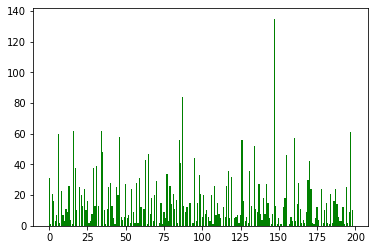

In [42]:
#Affichage de l'histogramme d'une image, pour exemple
plt.bar(data_orb['countBoW'][25].keys(), data_orb['countBoW'][25].values(),color='g')
plt.show()

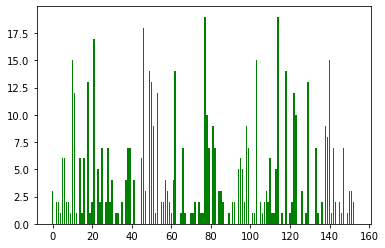

In [43]:
#Affichage de l'histogramme d'une image, pour exemple
plt.bar(data_sift['countBoW'][25].keys(), data_sift['countBoW'][25].values(),color='g')
plt.show()

In [44]:
dic_orb = {}
clust = np.unique(kmeans_orb.labels_)
for i in range(len(clust)):
    dic_orb[i]=0
dic_orb

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [45]:
dic_sift = {}
clust = np.unique(kmeans_sift.labels_)
for i in range(len(clust)):
    dic_sift[i]=0
dic_sift

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [46]:
dic_orb.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209])

In [47]:
dic_sift.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209])

In [48]:
#création de l'histogramme de toute les images
for im in range(len(data_orb)):
    for des in data_orb['countBoW'][im]:
        dic_orb[des]=dic_orb[des]+data_orb['countBoW'][im][des]
dic_orb

{0: 47311,
 1: 48187,
 2: 44585,
 3: 37585,
 4: 52157,
 5: 37712,
 6: 53852,
 7: 62914,
 8: 53066,
 9: 42539,
 10: 46913,
 11: 26222,
 12: 41601,
 13: 43330,
 14: 47092,
 15: 37798,
 16: 45718,
 17: 51704,
 18: 40920,
 19: 47782,
 20: 44855,
 21: 40743,
 22: 37503,
 23: 37579,
 24: 54640,
 25: 38717,
 26: 35615,
 27: 49398,
 28: 54241,
 29: 43860,
 30: 66215,
 31: 35278,
 32: 44843,
 33: 49989,
 34: 42392,
 35: 55310,
 36: 37653,
 37: 44085,
 38: 36772,
 39: 46732,
 40: 37183,
 41: 49602,
 42: 32068,
 43: 35533,
 44: 44348,
 45: 44636,
 46: 49344,
 47: 31538,
 48: 54100,
 49: 31784,
 50: 33335,
 51: 51201,
 52: 52155,
 53: 35264,
 54: 46613,
 55: 32960,
 56: 36116,
 57: 33465,
 58: 34201,
 59: 39646,
 60: 42880,
 61: 52960,
 62: 26525,
 63: 36848,
 64: 31937,
 65: 42844,
 66: 39339,
 67: 41647,
 68: 32429,
 69: 40515,
 70: 39815,
 71: 43588,
 72: 40487,
 73: 48040,
 74: 57522,
 75: 30584,
 76: 39903,
 77: 36906,
 78: 28416,
 79: 39474,
 80: 28870,
 81: 36892,
 82: 55940,
 83: 31593,
 8

In [49]:
#création de l'histogramme de toute les images
for im in range(len(data_sift)):
    for des in data_sift['countBoW'][im]:
        dic_sift[des]=dic_sift[des]+data_sift['countBoW'][im][des]
dic_sift

{0: 37426,
 1: 41250,
 2: 39702,
 3: 26865,
 4: 32927,
 5: 33586,
 6: 55771,
 7: 31359,
 8: 33191,
 9: 61904,
 10: 36422,
 11: 34260,
 12: 66792,
 13: 62739,
 14: 62725,
 15: 40023,
 16: 48357,
 17: 55005,
 18: 37719,
 19: 31293,
 20: 26276,
 21: 35822,
 22: 56005,
 23: 45335,
 24: 32471,
 25: 33724,
 26: 34171,
 27: 45427,
 28: 32198,
 29: 42066,
 30: 26230,
 31: 24138,
 32: 31991,
 33: 44426,
 34: 36487,
 35: 29577,
 36: 38750,
 37: 24495,
 38: 30994,
 39: 35093,
 40: 39053,
 41: 39716,
 42: 69015,
 43: 35977,
 44: 41245,
 45: 28551,
 46: 32596,
 47: 34671,
 48: 32737,
 49: 39995,
 50: 45645,
 51: 56151,
 52: 40947,
 53: 32574,
 54: 46254,
 55: 31484,
 56: 39580,
 57: 34814,
 58: 42819,
 59: 33981,
 60: 42128,
 61: 31200,
 62: 28232,
 63: 29982,
 64: 46721,
 65: 25697,
 66: 37809,
 67: 36626,
 68: 27471,
 69: 32379,
 70: 37249,
 71: 35942,
 72: 61952,
 73: 40243,
 74: 32482,
 75: 53094,
 76: 29746,
 77: 30829,
 78: 38932,
 79: 34516,
 80: 20881,
 81: 36434,
 82: 32855,
 83: 38455,
 8

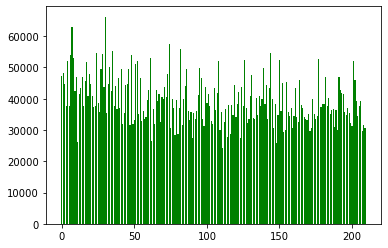

In [50]:
plt.bar(dic_orb.keys(), dic_orb.values(),color='g')
plt.show()

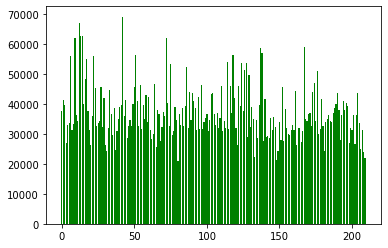

In [51]:
plt.bar(dic_sift.keys(), dic_sift.values(),color='g')
plt.show()

In [52]:
df_bow_orb = pd.DataFrame.from_dict(data_orb['countBoW'][0], orient='index')
for i in range(1,len(data_orb)):
    new = pd.DataFrame.from_dict(data_orb['countBoW'][i], orient='index')
    df_bow_orb.insert(i, str(i),new)
df_bow_orb = df_bow_orb.T
df_bow_orb

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,69.0,44.0,44.0,59.0,28.0,62.0,72.0,32.0,53.0,21.0,...,25.0,60.0,37.0,32.0,44.0,61.0,57.0,29.0,50.0,25.0
1,45.0,41.0,24.0,59.0,42.0,51.0,27.0,21.0,44.0,10.0,...,104.0,151.0,10.0,26.0,28.0,47.0,42.0,34.0,89.0,39.0
2,40.0,38.0,27.0,26.0,53.0,36.0,55.0,149.0,26.0,81.0,...,36.0,204.0,106.0,66.0,21.0,22.0,33.0,35.0,37.0,25.0
3,81.0,20.0,42.0,93.0,12.0,41.0,57.0,8.0,85.0,7.0,...,42.0,34.0,22.0,16.0,45.0,89.0,41.0,50.0,60.0,30.0
4,38.0,121.0,69.0,45.0,83.0,42.0,3.0,26.0,44.0,22.0,...,65.0,36.0,5.0,71.0,11.0,17.0,57.0,33.0,42.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,36.0,110.0,57.0,20.0,189.0,57.0,18.0,124.0,49.0,59.0,...,41.0,115.0,33.0,68.0,10.0,19.0,43.0,37.0,29.0,64.0
1046,30.0,69.0,11.0,11.0,106.0,13.0,15.0,47.0,23.0,18.0,...,20.0,47.0,15.0,31.0,15.0,4.0,39.0,14.0,19.0,14.0
1047,41.0,62.0,101.0,31.0,108.0,52.0,21.0,65.0,52.0,33.0,...,28.0,37.0,58.0,48.0,6.0,12.0,51.0,12.0,44.0,46.0
1048,23.0,25.0,19.0,8.0,129.0,15.0,17.0,66.0,19.0,17.0,...,19.0,78.0,30.0,24.0,31.0,6.0,12.0,13.0,29.0,19.0


In [53]:
df_bow_sift = pd.DataFrame.from_dict(data_sift['countBoW'][0], orient='index')
for i in range(1,len(data_sift)):
    new = pd.DataFrame.from_dict(data_sift['countBoW'][i], orient='index')
    df_bow_sift.insert(i, str(i),new)
df_bow_sift = df_bow_sift.T
df_bow_sift

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,221.0,213.0,121.0,110.0,449.0,155.0,367.0,97.0,89.0,1821.0,...,232.0,266.0,249.0,178.0,189.0,373.0,443.0,254.0,59.0,64.0
1,195.0,149.0,173.0,126.0,189.0,167.0,327.0,271.0,100.0,69.0,...,47.0,198.0,99.0,400.0,304.0,235.0,119.0,87.0,102.0,240.0
2,141.0,149.0,178.0,14.0,50.0,110.0,45.0,55.0,23.0,87.0,...,31.0,95.0,19.0,88.0,214.0,94.0,20.0,26.0,64.0,43.0
3,144.0,47.0,80.0,83.0,26.0,98.0,21.0,38.0,31.0,16.0,...,15.0,65.0,14.0,76.0,77.0,67.0,4.0,35.0,115.0,86.0
4,210.0,212.0,157.0,156.0,381.0,287.0,560.0,325.0,260.0,175.0,...,385.0,183.0,566.0,357.0,221.0,445.0,255.0,145.0,196.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,3.0,1.0,24.0,13.0,12.0,18.0,12.0,16.0,47.0,7.0,...,19.0,9.0,52.0,6.0,6.0,12.0,NaN,NaN,NaN,NaN
1046,1.0,1.0,1.0,1.0,2.0,3.0,6.0,3.0,17.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047,4.0,1.0,11.0,10.0,14.0,3.0,10.0,16.0,17.0,12.0,...,13.0,8.0,23.0,17.0,6.0,7.0,NaN,NaN,NaN,NaN
1048,1.0,0.0,1.0,4.0,6.0,0.0,20.0,1.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pour finir on va valoriser les données manquantes, si il y en a, par la valeur médiane .

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [55]:
imputer = SimpleImputer(strategy='median')
orb_bow=imputer.fit_transform(df_bow_orb)
orb_bow=pd.DataFrame(orb_bow)
orb_bow

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,69.0,44.0,44.0,59.0,28.0,62.0,72.0,32.0,53.0,21.0,...,25.0,60.0,37.0,32.0,44.0,61.0,57.0,29.0,50.0,25.0
1,45.0,41.0,24.0,59.0,42.0,51.0,27.0,21.0,44.0,10.0,...,104.0,151.0,10.0,26.0,28.0,47.0,42.0,34.0,89.0,39.0
2,40.0,38.0,27.0,26.0,53.0,36.0,55.0,149.0,26.0,81.0,...,36.0,204.0,106.0,66.0,21.0,22.0,33.0,35.0,37.0,25.0
3,81.0,20.0,42.0,93.0,12.0,41.0,57.0,8.0,85.0,7.0,...,42.0,34.0,22.0,16.0,45.0,89.0,41.0,50.0,60.0,30.0
4,38.0,121.0,69.0,45.0,83.0,42.0,3.0,26.0,44.0,22.0,...,65.0,36.0,5.0,71.0,11.0,17.0,57.0,33.0,42.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,36.0,110.0,57.0,20.0,189.0,57.0,18.0,124.0,49.0,59.0,...,41.0,115.0,33.0,68.0,10.0,19.0,43.0,37.0,29.0,64.0
1046,30.0,69.0,11.0,11.0,106.0,13.0,15.0,47.0,23.0,18.0,...,20.0,47.0,15.0,31.0,15.0,4.0,39.0,14.0,19.0,14.0
1047,41.0,62.0,101.0,31.0,108.0,52.0,21.0,65.0,52.0,33.0,...,28.0,37.0,58.0,48.0,6.0,12.0,51.0,12.0,44.0,46.0
1048,23.0,25.0,19.0,8.0,129.0,15.0,17.0,66.0,19.0,17.0,...,19.0,78.0,30.0,24.0,31.0,6.0,12.0,13.0,29.0,19.0


In [56]:
imputer = SimpleImputer(strategy='median')
sift_bow=imputer.fit_transform(df_bow_sift)
sift_bow=pd.DataFrame(sift_bow)
sift_bow

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,221.0,213.0,121.0,110.0,449.0,155.0,367.0,97.0,89.0,1821.0,...,232.0,266.0,249.0,178.0,189.0,373.0,443.0,254.0,59.0,64.0
1,195.0,149.0,173.0,126.0,189.0,167.0,327.0,271.0,100.0,69.0,...,47.0,198.0,99.0,400.0,304.0,235.0,119.0,87.0,102.0,240.0
2,141.0,149.0,178.0,14.0,50.0,110.0,45.0,55.0,23.0,87.0,...,31.0,95.0,19.0,88.0,214.0,94.0,20.0,26.0,64.0,43.0
3,144.0,47.0,80.0,83.0,26.0,98.0,21.0,38.0,31.0,16.0,...,15.0,65.0,14.0,76.0,77.0,67.0,4.0,35.0,115.0,86.0
4,210.0,212.0,157.0,156.0,381.0,287.0,560.0,325.0,260.0,175.0,...,385.0,183.0,566.0,357.0,221.0,445.0,255.0,145.0,196.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,3.0,1.0,24.0,13.0,12.0,18.0,12.0,16.0,47.0,7.0,...,19.0,9.0,52.0,6.0,6.0,12.0,21.5,21.0,36.0,51.5
1046,1.0,1.0,1.0,1.0,2.0,3.0,6.0,3.0,17.0,4.0,...,29.0,20.0,22.0,24.0,23.0,30.0,21.5,21.0,36.0,51.5
1047,4.0,1.0,11.0,10.0,14.0,3.0,10.0,16.0,17.0,12.0,...,13.0,8.0,23.0,17.0,6.0,7.0,21.5,21.0,36.0,51.5
1048,1.0,0.0,1.0,4.0,6.0,0.0,20.0,1.0,3.0,5.0,...,29.0,20.0,22.0,24.0,23.0,30.0,21.5,21.0,36.0,51.5


## D - Enregistrement des Bag of Visual Words <a name=D ></a>
On enregistre ensuite ces fichiers :

In [57]:
orb_bow.to_csv("Data/orb_bow_images.csv", index = False)
sift_bow.to_csv("Data/sift_bow_images.csv", index = False)